In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sys
import os
from pprint import pprint
import IPython.display as ipd ## Used to allow us to listen to audio in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./UrbanSound8K.csv') 

In [3]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [4]:
import librosa
import librosa.display

In [ ]:
# Run Above Cell

In [6]:
df.count()

slice_file_name    8732
fsID               8732
start              8732
end                8732
salience           8732
fold               8732
classID            8732
class              8732
dtype: int64

In [7]:
y, sr = librosa.load('./fold1/7061-6-0-0.wav')
sr

22050

In [11]:
def pad(arr, size):
    """
    Pad the arr to the given size.
    """
    return librosa.util.fix_length(arr, size=size)

In [9]:
X = []
labels = []

for i in range(8732):
    file_name = './fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
    y, sr = librosa.load(file_name, res_type='kaiser_fast', sr=22050)
    y = pad(y, 22050)
    y = y.reshape(-1, 1)
    X.append(y)
    labels.append(df["classID"][i])

In [10]:
X_array = np.array(X)
y_array = np.array(labels)

In [11]:
X_array.shape

(8732, 22050, 1)

In [12]:
y_array.shape

(8732,)

In [18]:
import h5py
hf = h5py.File('data1.h5', 'w')
hf.create_dataset('dataset_1', data=X_array)
hf.create_dataset('dataset_2', data=y_array)
hf.close()

In [27]:
import h5py
hf = hf = h5py.File('data1.h5', 'r')
load_x = hf.get('dataset_1')
load_y = hf.get('dataset_2')

X_array = np.array(load_x)
y_array = np.array(load_y)

In [28]:
X_array.shape

(8732, 22050, 1)

In [13]:
y_array.shape

(8732,)

In [31]:
from tensorflow.keras.utils import to_categorical 
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
y_encoded = to_categorical(labelencoder.fit_transform(y_array))
print(y_array)
print(y_encoded)

[3 2 2 ... 1 1 1]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [7]:
y_encoded.shape

(8732, 10)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_array, y_encoded, test_size=0.2, random_state=42)

In [22]:
X_array[0].shape

(22050, 1)

In [30]:
model_input=(22050, 1)

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, LSTM, SimpleRNN, Conv2D, Conv1D, MaxPool1D, MaxPooling2D, Dropout, Flatten

In [18]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(model_input)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 22048, 32)         128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 705536)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                35276850  
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 35,277,488
Trainable params: 35,277,488
Non-trainable params: 0
_________________________________________________________________


In [31]:
X_train.shape

(6985, 22050, 1)

In [32]:
y_train.shape

(6985, 10)

In [26]:
model.fit(X_train, y_train, epochs = 100, batch_size = 64, validation_data = (X_test, y_test))
predictions = model.predict(X_test)

Epoch 1/100


TypeError: 'NoneType' object is not callable

# Second Model
Using raw input data

In [10]:
model2 = Sequential()

model2.add(Dense(512, input_shape=(model_input), activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Flatten()) 
model2.add(Dense(10, activation="softmax"))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-04-17 21:09:27.015415: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-04-17 21:09:27.060002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-17 21:09:27.060583: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.755GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-04-17 21:09:27.060985: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-04-17 21:09:27.063089: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-04-17 21:09:27.064657: I tensorflow/stream_executor/pl

In [11]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 22050, 512)        1024      
_________________________________________________________________
dropout (Dropout)            (None, 22050, 512)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 22050, 256)        131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 22050, 256)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 22050, 128)        32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 22050, 128)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2822400)           0

In [12]:
model2.fit(X_train, y_train, epochs = 50, batch_size = 64, validation_data = (X_test, y_test))

Epoch 1/50


2022-04-17 21:15:18.966056: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


110/110 [==============================] - 62s 561ms/step - loss: 2.1982 - accuracy: 0.1928 - val_loss: 2.0859 - val_accuracy: 0.2376
Epoch 2/50
110/110 [==============================] - 62s 564ms/step - loss: 1.8362 - accuracy: 0.3523 - val_loss: 2.3116 - val_accuracy: 0.2003
Epoch 3/50
110/110 [==============================] - 62s 566ms/step - loss: 1.3352 - accuracy: 0.5519 - val_loss: 3.0392 - val_accuracy: 0.2192
Epoch 4/50
110/110 [==============================] - 62s 564ms/step - loss: 0.9501 - accuracy: 0.6986 - val_loss: 3.9034 - val_accuracy: 0.1929
Epoch 5/50
110/110 [==============================] - 62s 564ms/step - loss: 0.7048 - accuracy: 0.7755 - val_loss: 5.1702 - val_accuracy: 0.2181
Epoch 6/50
110/110 [==============================] - 62s 564ms/step - loss: 0.6165 - accuracy: 0.8139 - val_loss: 4.9471 - val_accuracy: 0.2129
Epoch 7/50
110/110 [==============================] - 62s 565ms/step - loss: 0.4666 - accuracy: 0.8586 - val_loss: 7.4909 - val_accuracy: 0.1

NameError: name 'model' is not defined

https://prnt.sc/4W2hJo-cK6tm
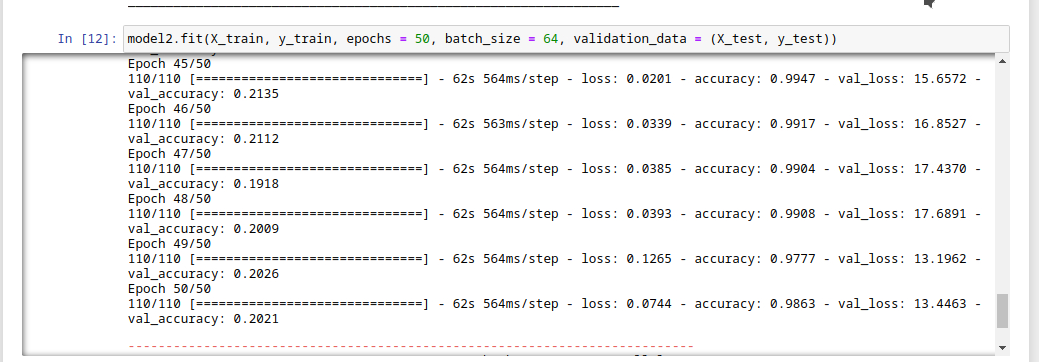

In [13]:
predictions = model2.predict(X_test)

In [23]:
print(X_train[0])

[[0.10327783]
 [0.12884857]
 [0.04755935]
 ...
 [0.19942844]
 [0.22710066]
 [0.19504483]]


In [24]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [25]:
print(X_test[0])

[[-0.01251079]
 [-0.02669682]
 [-0.02674609]
 ...
 [-0.34053823]
 [-0.29521257]
 [-0.2206356 ]]


In [48]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [52]:
X = []
labels = []

for i in range(8732):
    file_name = './fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
    y, sr = librosa.load(file_name, res_type='kaiser_fast')
    feature = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T,axis=0)        
    X.append(feature)
    labels.append(df["classID"][i])

In [53]:
X_array = np.array(X)
y_array = np.array(labels)

In [54]:
X_array = X_array.reshape(8732, 128)

In [ ]:
X_array.shape

In [55]:
from tensorflow.keras.utils import to_categorical 
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
y_encoded = to_categorical(labelencoder.fit_transform(y_array))
print(y_array)
print(y_encoded)

[3 2 2 ... 1 1 1]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_array, y_encoded, test_size=0.2, random_state=42)

In [59]:
X_train.shape

(6985, 128)

In [60]:
X_test.shape

(1747, 128)

In [61]:
X_train = X_train.reshape(6985, 16, 8, 1)
X_test = X_test.reshape(1747, 16, 8, 1)

In [ ]:
X_train.shape

In [62]:
model_input=(16, 8, 1)

# Model on Melspectogram Data

In [63]:
model3 = Sequential()

model3.add(Dense(1024, input_shape=(model_input), activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Flatten()) 
model3.add(Dense(10, activation="softmax"))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# RandomForest Classifier

In [72]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_array, y_encoded, test_size=0.2, random_state=42)

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_rf, y_train_rf)
predictions = rf_model.predict(X_test_rf)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [96]:
def matrix_score(y_test, predictions):
    my_matrix = multilabel_confusion_matrix(y_test, predictions)
    TP = my_matrix[1][1]
    TN = my_matrix[0][0]
    FP = my_matrix[0][1]
    FN = my_matrix[1][0]
    
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    conf_missclassification = 1- conf_accuracy
    conf_sensitivity = (TP / float(TP + FN))
    conf_specificity = (TN / float(TN + FP))
    
    print()
    print('Accuracy:', '%.3f' % conf_accuracy)
    print('Missclassifcation:', '%.3f' % conf_missclassification)
    print('Sensitivity:', '%.3f' % conf_sensitivity)
    print('Specificity:', '%.3f' % conf_specificity)

In [100]:
print("Classification Report: ")
print(classification_report(y_test_rf, predictions))
print()
print("Confusion Matrix: ")
print(multilabel_confusion_matrix(y_test_rf, predictions))
# matrix_score(y_test_rf, predictions)

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       203
           1       1.00      0.31      0.48        86
           2       0.89      0.43      0.58       183
           3       1.00      0.59      0.74       201
           4       0.99      0.66      0.79       206
           5       0.99      0.91      0.95       193
           6       1.00      0.51      0.68        72
           7       0.98      0.81      0.89       208
           8       0.99      0.81      0.89       165
           9       0.97      0.29      0.45       230

   micro avg       0.98      0.64      0.77      1747
   macro avg       0.98      0.62      0.73      1747
weighted avg       0.98      0.64      0.75      1747
 samples avg       0.64      0.64      0.64      1747


Confusion Matrix: 
[[[1543    1]
  [  34  169]]

 [[1661    0]
  [  59   27]]

 [[1554   10]
  [ 104   79]]

 [[1546    0]
  [  83  118]]

 [[1539    2]
  [  71  

In [103]:
from sklearn.metrics import precision_score

precision_score(y_test_rf, predictions, average='micro')

0.9814323607427056

In [104]:
from sklearn.metrics import log_loss

loss = log_loss(y_test_rf, predictions, eps=1e-15)

In [105]:
print(loss)

1.227078844495139


In [108]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_rf, predictions, multi_class='ovr')

0.8071360197554934